In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv("german_credit_data.csv", index_col=0)

In [18]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Датасет содержит информацию о заемщиках. За целевую берем Credit amount.

In [19]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Убираем колонки с null значениями

In [20]:
data.dropna(axis=1, how="any", inplace=True)

In [21]:
data.isna().sum()

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
dtype: int64

Преобразовываем текстовые значения в числовые

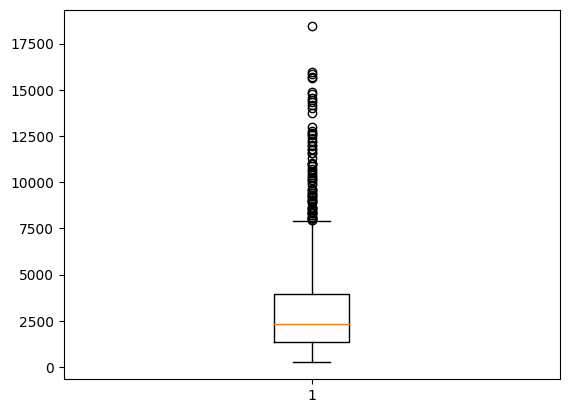

In [38]:
plt.boxplot(data['Credit amount']);

Значения целевой переменной больше всего распределено от 0 до 7500, также имеются выбросы до 17500

In [22]:
data['Sex'] = pd.factorize(data["Sex"])[0]
data['Housing'] = pd.factorize(data["Housing"])[0]
data['Purpose'] = pd.factorize(data["Purpose"])[0]

In [23]:
X, y = data.drop(columns=["Credit amount"]), data["Credit amount"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'score = {model.score(X_test, y_test)}')

MAE = 1566.869392202184
MSE = 4654771.0917845
score = 0.48775136451743983


In [29]:
def polyFunction(deg):
  poly = PolynomialFeatures(degree=deg)
  poly_features_train = poly.fit_transform(X_train)
  poly_features_test = poly.fit_transform(X_test)
  binary = LinearRegression()
  binary.fit(poly_features_train, y_train)
  y_pred = binary.predict(poly_features_test)
  print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
  print(f'MSE = {mean_squared_error(y_test, y_pred)}')
  return binary.score(poly_features_test, y_test)

In [31]:
for j in [i for i in range(11)]:
  print(f'Степень полинома: {j}')
  print(f'score: {polyFunction(j)}')

Степень полинома: 0
MAE = 2229.0627200000004
MSE = 9096650.572977778
score: -0.0010689573314999201
Степень полинома: 1
MAE = 1566.869392202184
MSE = 4654771.0917845005
score: 0.4877513645174397
Степень полинома: 2
MAE = 1562.537587774821
MSE = 4878645.067557375
score: 0.4631144626487065
Степень полинома: 3
MAE = 1641.6609696581604
MSE = 5593282.9542667
score: 0.3844699331728969
Степень полинома: 4
MAE = 2057.771798431118
MSE = 13322581.638602013
score: -0.4661245700188865
Степень полинома: 5
MAE = 9432.57955572807
MSE = 2197039143.6367283
score: -240.779946046333
Степень полинома: 6
MAE = 6608371.881352213
MSE = 1108795196699791.4
score: -122020784.84305616
Степень полинома: 7
MAE = 72370630.73934352
MSE = 2.5472658087380266e+17
score: -28032171914.830997
Степень полинома: 8
MAE = 57741856.069697715
MSE = 1.5299440402602477e+17
score: -16836740872.707186
Степень полинома: 9
MAE = 75869706.98362067
MSE = 1.3497864262139002e+17
score: -14854140866.23392
Степень полинома: 10
MAE = 1190882

По MSE и Score Лучшие значения показала полиномиальная модель со степенью полинома 1, а по MAE - со степенью 2.

Поочереди уберем по одному признаку и посмотрим результаты модели.

In [35]:
for col in X_train.columns:
  print(f"Без признака {col}")
  X_train2 = X_train.drop(columns=[col])
  X_test2 = X_test.drop(columns=[col])
  model = LinearRegression()
  model.fit(X_train2, y_train)
  y_pred = model.predict(X_test2)
  print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
  print(f'MSE = {mean_squared_error(y_test, y_pred)}')
  print(f'score = {model.score(X_test2, y_test)}')

Без признака Age
MAE = 1568.3182580817993
MSE = 4687260.9250205
score = 0.4841759206526337
Без признака Sex
MAE = 1568.931766355076
MSE = 4666510.589621681
score = 0.486459455285005
Без признака Job
MAE = 1600.164266993211
MSE = 4864182.304405079
score = 0.4647060620085862
Без признака Housing
MAE = 1575.6155520214966
MSE = 4698705.045368484
score = 0.4829165171466483
Без признака Duration
MAE = 2012.9271040660167
MSE = 8024044.265278286
score = 0.11696931065095684
Без признака Purpose
MAE = 1568.324180942066
MSE = 4659311.35781485
score = 0.48725171694446245


Самые лучшие значения у модели без признака AGE, а самые худжшие без признака Duration. Это значит, что целевая переменная больше всего зависит от признака Duration